## 0 - MODULES

In [1]:
# Classic
import numpy as np
import pandas as pd

# Perso
import sys
sys.path.append('../Mars-craters-challenge/')

from object_detector_Unet import *

# Graphic
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - MODEL

In [2]:
# Device
device = 'cuda:0'

# Architecture
net = Unet().to(device)

# Trained weights
model_path = '../models/craters_4.model'
net.load_state_dict(torch.load(model_path))

## 2 - DATA

In [3]:
BATCH_SIZE = 13

data_path = '/home/hugoperrin/Bureau/Datasets/Mars craters/'

Xtrain = np.load(data_path + 'data_train_mini.npy')
Ytrain = pd.read_csv(data_path + 'labels_train_mini.csv').values

batches = CraterDataset(Xtrain, BATCH_SIZE, Ytrain)

for inputs, targets in batches.loader:
    inputs = inputs.to(device)

## 3 - PREDICTION

In [4]:
confidences = net(inputs)

inputs.shape, targets.shape, confidences.shape

(torch.Size([13, 1, 224, 224]),
 torch.Size([13, 1, 224, 224]),
 torch.Size([13, 1, 224, 224]))

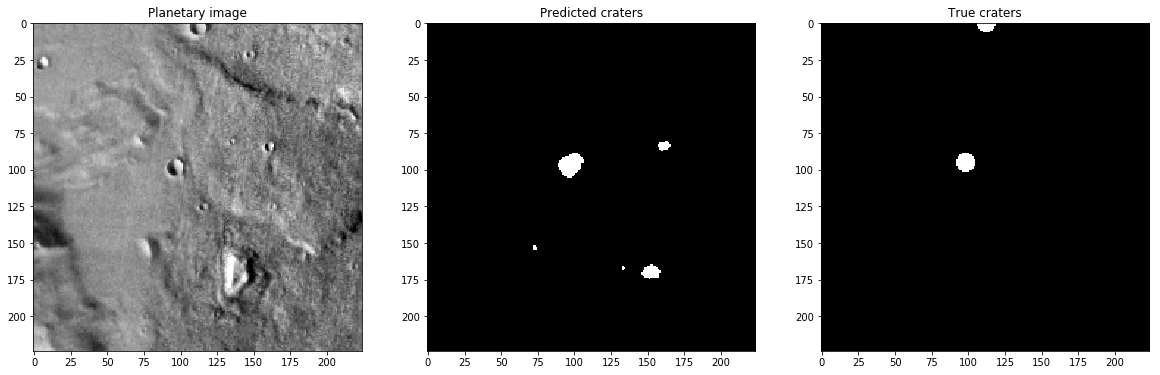

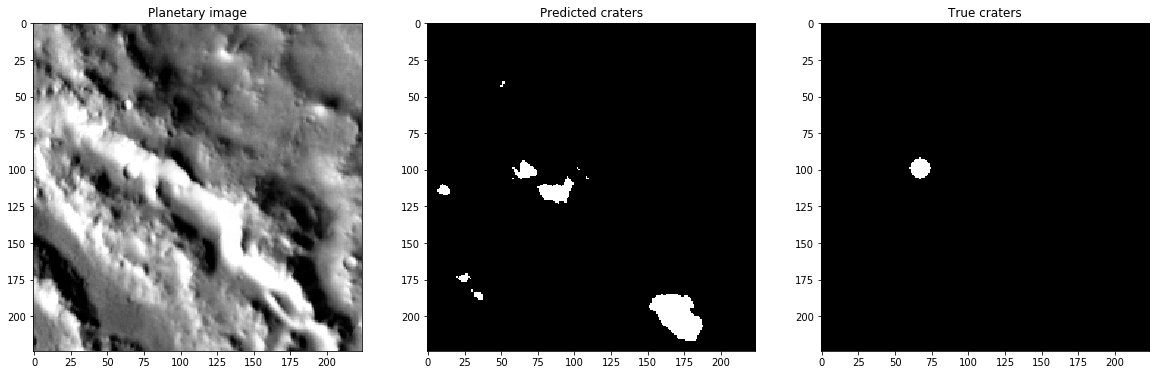

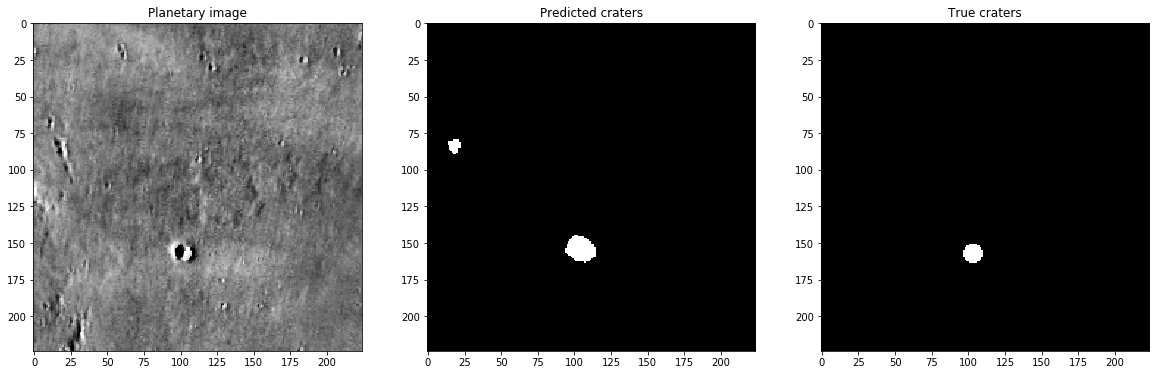

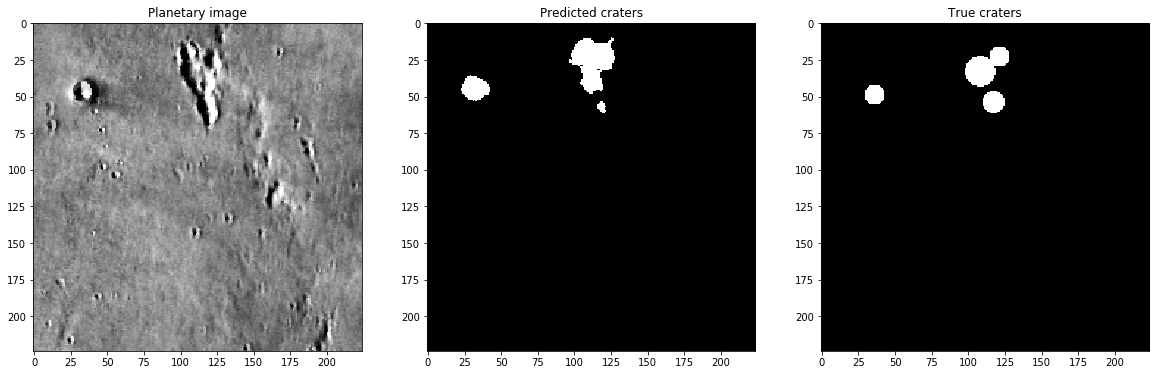

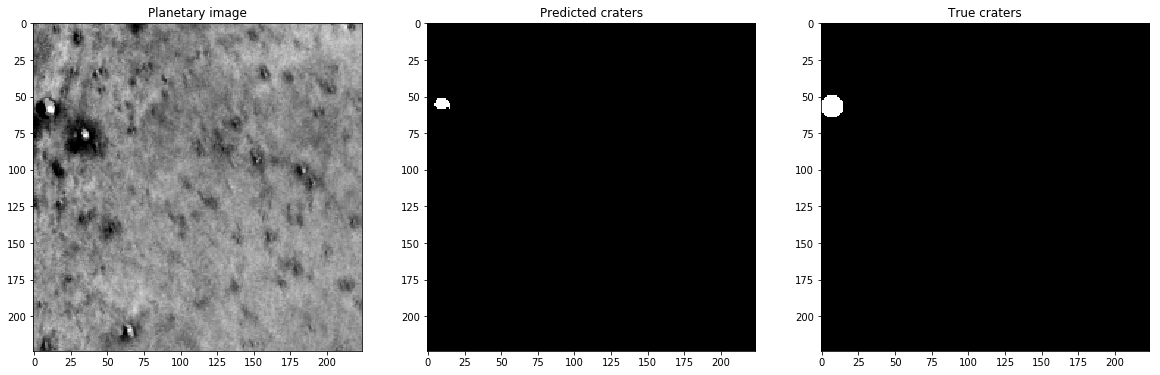

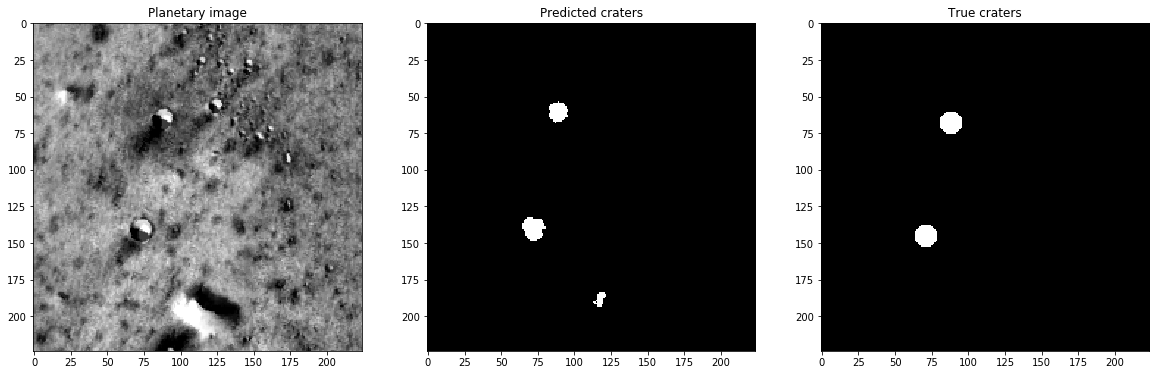

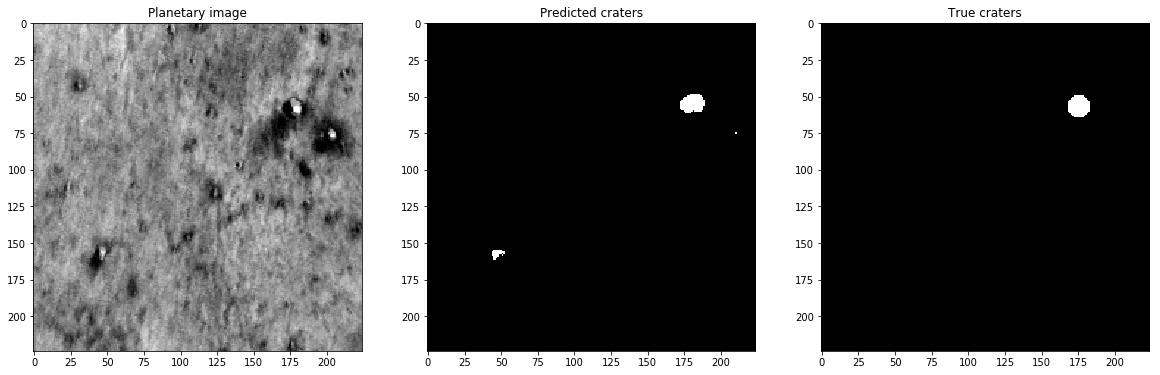

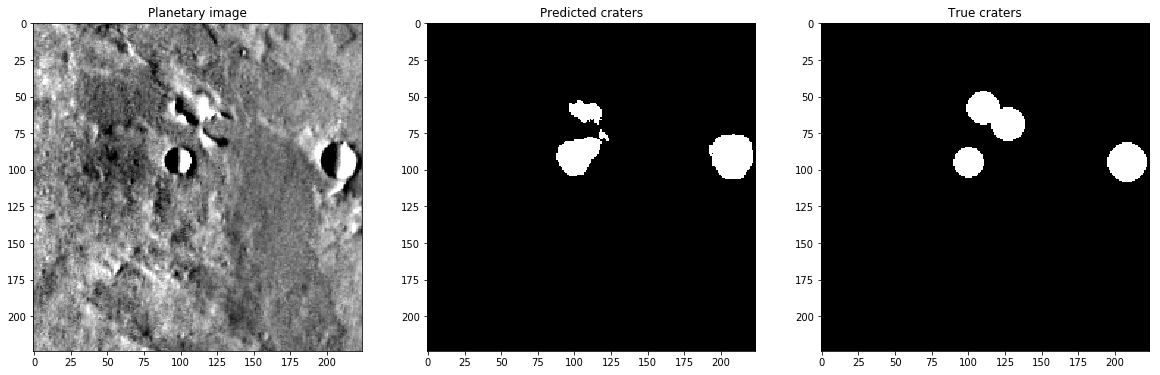

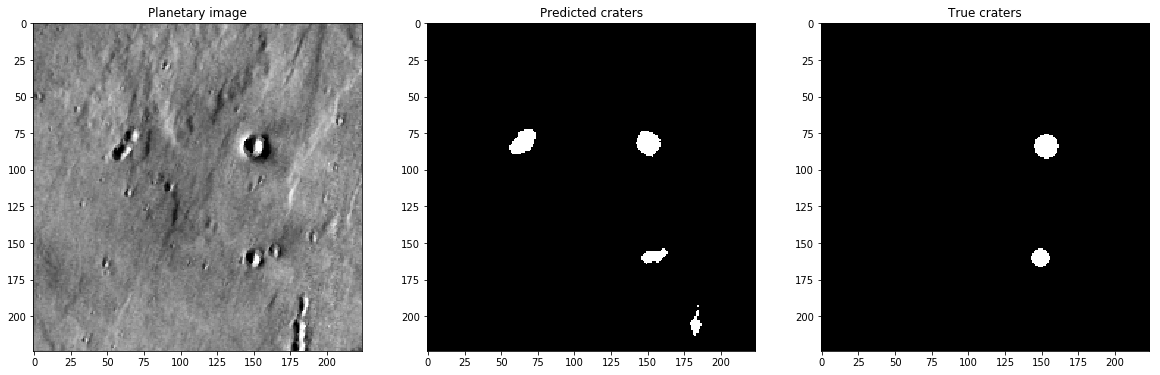

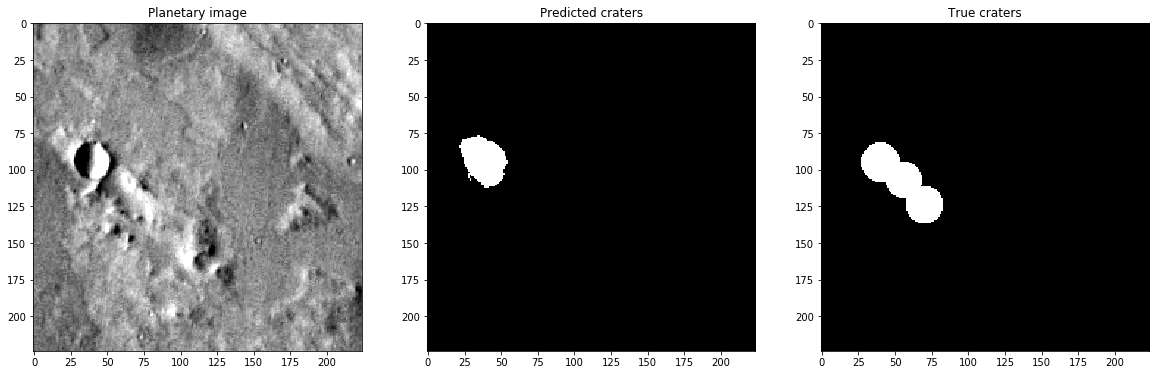

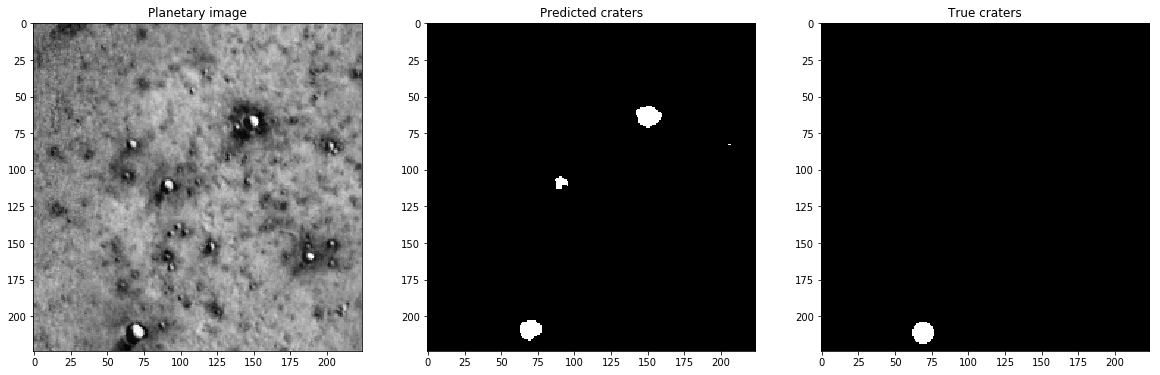

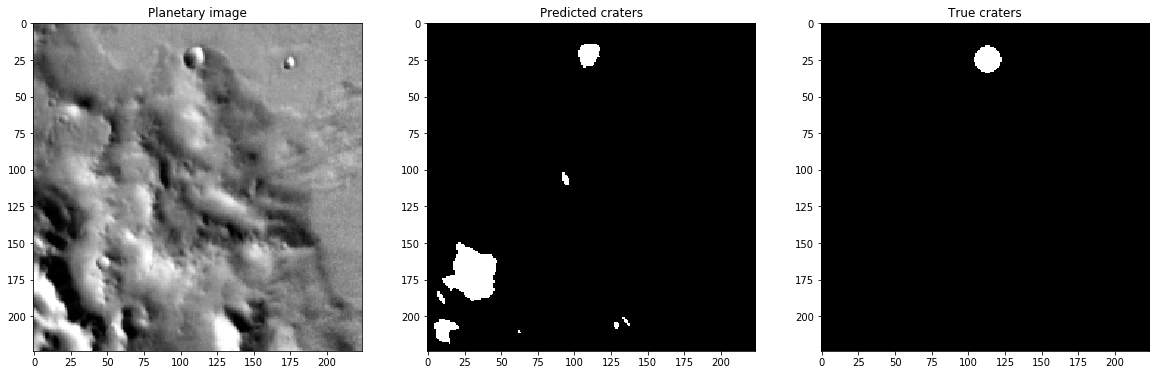

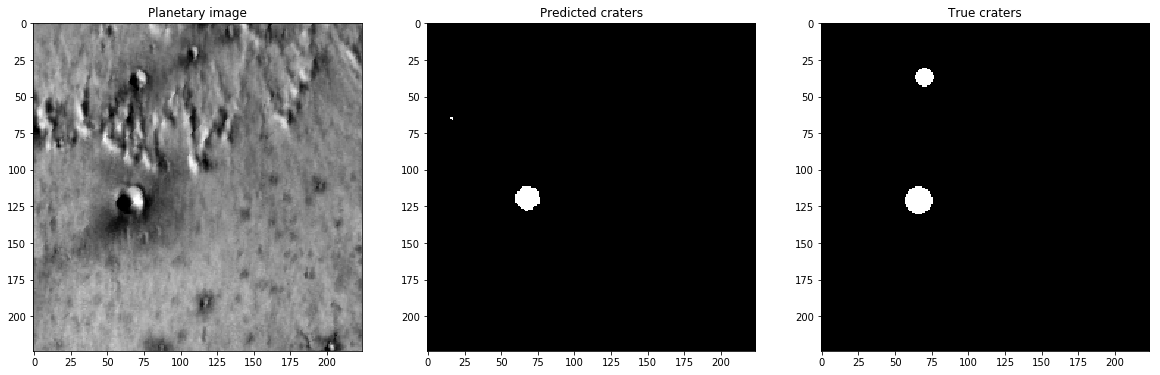

In [5]:
for image_idx in range(13):

    X = inputs[image_idx].squeeze(0)
    Y = targets[image_idx].squeeze(0)
    pred = confidences[image_idx].squeeze(0)

    prediction = get_prediction(pred, 0.3)
    
    fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

    ax[0].imshow(X * 255, cmap=plt.cm.gray)
    ax[1].imshow(prediction, cmap=plt.cm.gray)
    ax[2].imshow(Y, cmap=plt.cm.gray)

    ax[0].set_title('Planetary image')
    ax[1].set_title('Predicted craters')
    ax[2].set_title('True craters')

    plt.show()